In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# tensorflow 2.0
from tensorflow.keras.models import load_model  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense       
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.0.0


In [13]:
def standardize(raw):
    m = raw.mean()
    std = raw.std()
    modified = (raw - m) / std
    print('index=', i, 'm=', m, 'std=', std, sep=' ')
    return modified


In [20]:
# Read CSV file
df = pd.read_csv('./pima.csv',
            names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
print(type(df))
print(df.head(5))
print(df.info())

data = np.loadtxt('./pima.csv', delimiter=",")
print(type(data))
print(data.shape)

# Train data
x = data[0:568, 0:8] # 0 ~ 567, 0 ~ 7
y = data[0:568, 8:]   # 0 ~ 567, 8
print(x.shape)
print(y.shape)

# Standardization by attribute
x_train_t = x.T
print(x_train_t.shape)

for i in range(len(x_train_t)):
    x_train_t[i] = standardize(x_train_t[i])

x_train_t = x_train_t.T
x = x_train_t
print(x_train_t.shape)
print(x.shape)
print(y.shape)

# Validation data
x_val = data[568:668, 0:8] # 568 ~ 667, 0 ~ 7
y_val = data[568:668, 8:]  # 568 ~ 667, 8
print(x_val.shape)
print(y_val.shape)

# Test data
x_test = data[668:, 0:8] # 668 ~ , 0 ~ 7
y_test = data[668:, 8:]  # 668 ~ , 8
print(x_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
<class 'numpy.ndarray'>
(768, 9)
(568, 8)


In [17]:
model = Sequential()

# Avoid Overfit => Reduce network 
# model.add(Dense(128, input_dim=8, activation='relu')) 
# model.add(Dense(64, activation='relu')) 
model.add(Dense(36, input_dim=8, activation='relu')) 
model.add(Dense(20, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy']) 

# stop learning when min error occured 20 times
stop_point = EarlyStopping(monitor='loss', patience=20)

hist = model.fit(x, y, validation_data=(x_val, y_val),
                 epochs=1000, batch_size=10, callbacks=[stop_point])

Train on 568 samples, validate on 100 samples
Epoch 1/1000
568/568 [==============================] - 1s 2ms/sample - loss: 0.6476 - accuracy: 0.6444 - val_loss: 2.5561 - val_accuracy: 0.5000
Epoch 2/1000
568/568 [==============================] - 0s 183us/sample - loss: 0.5432 - accuracy: 0.7077 - val_loss: 16.1358 - val_accuracy: 0.3400
Epoch 3/1000
568/568 [==============================] - 0s 173us/sample - loss: 0.4945 - accuracy: 0.7729 - val_loss: 29.4530 - val_accuracy: 0.3400
Epoch 4/1000
568/568 [==============================] - 0s 171us/sample - loss: 0.4720 - accuracy: 0.7870 - val_loss: 35.7149 - val_accuracy: 0.3400
Epoch 5/1000
568/568 [==============================] - 0s 167us/sample - loss: 0.4641 - accuracy: 0.7870 - val_loss: 44.7550 - val_accuracy: 0.3400
Epoch 6/1000
568/568 [==============================] - 0s 169us/sample - loss: 0.4565 - accuracy: 0.7887 - val_loss: 44.6617 - val_accuracy: 0.3300
Epoch 7/1000
568/568 [==============================] - 0s 167u

568/568 [==============================] - 0s 169us/sample - loss: 0.2837 - accuracy: 0.8785 - val_loss: 74.1446 - val_accuracy: 0.3400
Epoch 56/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.2722 - accuracy: 0.8856 - val_loss: 74.3114 - val_accuracy: 0.3400
Epoch 57/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.2696 - accuracy: 0.8961 - val_loss: 85.0151 - val_accuracy: 0.3400
Epoch 58/1000
568/568 [==============================] - 0s 169us/sample - loss: 0.2664 - accuracy: 0.8891 - val_loss: 79.6596 - val_accuracy: 0.3400
Epoch 59/1000
568/568 [==============================] - 0s 171us/sample - loss: 0.2692 - accuracy: 0.8820 - val_loss: 75.0575 - val_accuracy: 0.3400
Epoch 60/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.2738 - accuracy: 0.8873 - val_loss: 84.6351 - val_accuracy: 0.3400
Epoch 61/1000
568/568 [==============================] - 0s 167us/sample - loss: 0.2626 - accuracy: 0.8856 - val_l

568/568 [==============================] - 0s 166us/sample - loss: 0.1222 - accuracy: 0.9577 - val_loss: 123.9136 - val_accuracy: 0.3400
Epoch 110/1000
568/568 [==============================] - 0s 171us/sample - loss: 0.1153 - accuracy: 0.9630 - val_loss: 133.5176 - val_accuracy: 0.3400
Epoch 111/1000
568/568 [==============================] - 0s 178us/sample - loss: 0.1239 - accuracy: 0.9507 - val_loss: 134.9978 - val_accuracy: 0.3400
Epoch 112/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.1158 - accuracy: 0.9560 - val_loss: 137.0432 - val_accuracy: 0.3400
Epoch 113/1000
568/568 [==============================] - 0s 167us/sample - loss: 0.1046 - accuracy: 0.9648 - val_loss: 132.5163 - val_accuracy: 0.3400
Epoch 114/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.1068 - accuracy: 0.9630 - val_loss: 144.2610 - val_accuracy: 0.3400
Epoch 115/1000
568/568 [==============================] - 0s 171us/sample - loss: 0.1072 - accuracy: 0.

Epoch 163/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.0354 - accuracy: 0.9930 - val_loss: 242.0904 - val_accuracy: 0.3400
Epoch 164/1000
568/568 [==============================] - 0s 176us/sample - loss: 0.0339 - accuracy: 0.9947 - val_loss: 226.6336 - val_accuracy: 0.3400
Epoch 165/1000
568/568 [==============================] - 0s 173us/sample - loss: 0.0315 - accuracy: 0.9965 - val_loss: 239.1447 - val_accuracy: 0.3400
Epoch 166/1000
568/568 [==============================] - 0s 171us/sample - loss: 0.0338 - accuracy: 0.9930 - val_loss: 224.8232 - val_accuracy: 0.3400
Epoch 167/1000
568/568 [==============================] - 0s 178us/sample - loss: 0.0318 - accuracy: 0.9947 - val_loss: 239.8657 - val_accuracy: 0.3400
Epoch 168/1000
568/568 [==============================] - 0s 171us/sample - loss: 0.0394 - accuracy: 0.9912 - val_loss: 236.2126 - val_accuracy: 0.3400
Epoch 169/1000
568/568 [==============================] - 0s 174us/sample - loss: 0.0296

Epoch 217/1000
568/568 [==============================] - 0s 167us/sample - loss: 0.0136 - accuracy: 1.0000 - val_loss: 353.8543 - val_accuracy: 0.3400
Epoch 218/1000
568/568 [==============================] - 0s 162us/sample - loss: 0.0104 - accuracy: 1.0000 - val_loss: 356.4461 - val_accuracy: 0.3400
Epoch 219/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.0095 - accuracy: 1.0000 - val_loss: 357.6706 - val_accuracy: 0.3400
Epoch 220/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.0089 - accuracy: 1.0000 - val_loss: 356.2276 - val_accuracy: 0.3400
Epoch 221/1000
568/568 [==============================] - 0s 167us/sample - loss: 0.0085 - accuracy: 1.0000 - val_loss: 358.3706 - val_accuracy: 0.3400
Epoch 222/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.0086 - accuracy: 1.0000 - val_loss: 358.1107 - val_accuracy: 0.3400
Epoch 223/1000
568/568 [==============================] - 0s 162us/sample - loss: 0.0078

Epoch 271/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.0038 - accuracy: 1.0000 - val_loss: 419.9039 - val_accuracy: 0.3400
Epoch 272/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.0038 - accuracy: 1.0000 - val_loss: 421.0351 - val_accuracy: 0.3400
Epoch 273/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.0039 - accuracy: 1.0000 - val_loss: 422.4999 - val_accuracy: 0.3400
Epoch 274/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.0035 - accuracy: 1.0000 - val_loss: 427.8864 - val_accuracy: 0.3400
Epoch 275/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 418.2084 - val_accuracy: 0.3400
Epoch 276/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 428.1928 - val_accuracy: 0.3400
Epoch 277/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.0033

Epoch 325/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 435.9507 - val_accuracy: 0.3400
Epoch 326/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.0058 - accuracy: 1.0000 - val_loss: 445.9298 - val_accuracy: 0.3400
Epoch 327/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.1015 - accuracy: 0.9754 - val_loss: 501.8462 - val_accuracy: 0.3400
Epoch 328/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.0987 - accuracy: 0.9754 - val_loss: 457.9842 - val_accuracy: 0.3400
Epoch 329/1000
568/568 [==============================] - 0s 173us/sample - loss: 0.0442 - accuracy: 0.9877 - val_loss: 467.1385 - val_accuracy: 0.3400
Epoch 330/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.0247 - accuracy: 0.9930 - val_loss: 471.2796 - val_accuracy: 0.3400
Epoch 331/1000
568/568 [==============================] - 0s 167us/sample - loss: 0.0061

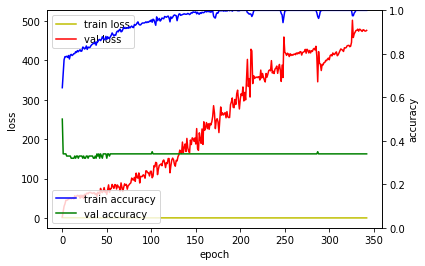

In [19]:
fig, loss_ax = plt.subplots()

# double y-axis
acc_ax = loss_ax.twinx() 

# y-axis (left)
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# y-axis (right)
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# axis labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.6738691703352915 /정확도: 68.99999976158142 %


In [10]:
from tensorflow.keras import regularizers 

model2 = Sequential()

model2.add(Dense(128, input_shape=(8, ), activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model2.add(Dense(64, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy']) 

# stop learning when min error occured 20 times
stop_point2 = EarlyStopping(monitor='loss', patience=20)

hist2 = model2.fit(x, y, validation_data=(x_val, y_val),
                 epochs=1000, batch_size=10, callbacks=[stop_point2])

Train on 568 samples, validate on 100 samples
Epoch 1/1000
568/568 [==============================] - 1s 1ms/sample - loss: 1.7559 - accuracy: 0.6144 - val_loss: 1.7139 - val_accuracy: 0.5500
Epoch 2/1000
568/568 [==============================] - 0s 187us/sample - loss: 1.5230 - accuracy: 0.6250 - val_loss: 1.5928 - val_accuracy: 0.5400
Epoch 3/1000
568/568 [==============================] - 0s 188us/sample - loss: 1.2650 - accuracy: 0.6602 - val_loss: 1.2147 - val_accuracy: 0.6800
Epoch 4/1000
568/568 [==============================] - 0s 187us/sample - loss: 1.1915 - accuracy: 0.6567 - val_loss: 1.1885 - val_accuracy: 0.6800
Epoch 5/1000
568/568 [==============================] - 0s 181us/sample - loss: 1.1640 - accuracy: 0.6725 - val_loss: 1.1522 - val_accuracy: 0.6700
Epoch 6/1000
568/568 [==============================] - 0s 183us/sample - loss: 1.1262 - accuracy: 0.6778 - val_loss: 1.1480 - val_accuracy: 0.6500
Epoch 7/1000
568/568 [==============================] - 0s 183us/sam

Epoch 56/1000
568/568 [==============================] - 0s 205us/sample - loss: 0.6874 - accuracy: 0.7447 - val_loss: 0.7682 - val_accuracy: 0.6300
Epoch 57/1000
568/568 [==============================] - 0s 198us/sample - loss: 0.6941 - accuracy: 0.7289 - val_loss: 0.7327 - val_accuracy: 0.6600
Epoch 58/1000
568/568 [==============================] - 0s 201us/sample - loss: 0.6924 - accuracy: 0.7201 - val_loss: 0.7467 - val_accuracy: 0.7100
Epoch 59/1000
568/568 [==============================] - 0s 201us/sample - loss: 0.6858 - accuracy: 0.7342 - val_loss: 0.7017 - val_accuracy: 0.7200
Epoch 60/1000
568/568 [==============================] - 0s 201us/sample - loss: 0.6948 - accuracy: 0.7042 - val_loss: 0.7358 - val_accuracy: 0.6200
Epoch 61/1000
568/568 [==============================] - 0s 202us/sample - loss: 0.6849 - accuracy: 0.7271 - val_loss: 0.7218 - val_accuracy: 0.6900
Epoch 62/1000
568/568 [==============================] - 0s 202us/sample - loss: 0.6594 - accuracy: 0.7447

Epoch 111/1000
568/568 [==============================] - 0s 181us/sample - loss: 0.5459 - accuracy: 0.7553 - val_loss: 0.5952 - val_accuracy: 0.7800
Epoch 112/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.5299 - accuracy: 0.7658 - val_loss: 0.6289 - val_accuracy: 0.6800
Epoch 113/1000
568/568 [==============================] - 0s 178us/sample - loss: 0.5246 - accuracy: 0.7817 - val_loss: 0.6084 - val_accuracy: 0.7300
Epoch 114/1000
568/568 [==============================] - 0s 189us/sample - loss: 0.5570 - accuracy: 0.7394 - val_loss: 0.6056 - val_accuracy: 0.7400
Epoch 115/1000
568/568 [==============================] - 0s 182us/sample - loss: 0.5514 - accuracy: 0.7588 - val_loss: 0.6603 - val_accuracy: 0.7000
Epoch 116/1000
568/568 [==============================] - 0s 183us/sample - loss: 0.5578 - accuracy: 0.7588 - val_loss: 0.6087 - val_accuracy: 0.7300
Epoch 117/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.5366 - accuracy:

Epoch 220/1000
568/568 [==============================] - 0s 187us/sample - loss: 0.4262 - accuracy: 0.8081 - val_loss: 0.6052 - val_accuracy: 0.7400
Epoch 221/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.4184 - accuracy: 0.8116 - val_loss: 0.6541 - val_accuracy: 0.7600
Epoch 222/1000
568/568 [==============================] - 0s 192us/sample - loss: 0.4377 - accuracy: 0.8187 - val_loss: 0.6378 - val_accuracy: 0.7700
Epoch 223/1000
568/568 [==============================] - 0s 195us/sample - loss: 0.4292 - accuracy: 0.8081 - val_loss: 0.6540 - val_accuracy: 0.7200
Epoch 224/1000
568/568 [==============================] - 0s 188us/sample - loss: 0.4357 - accuracy: 0.8134 - val_loss: 0.6024 - val_accuracy: 0.7500
Epoch 225/1000
568/568 [==============================] - 0s 183us/sample - loss: 0.4458 - accuracy: 0.8028 - val_loss: 0.6202 - val_accuracy: 0.7900
Epoch 226/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.4236 - accuracy:

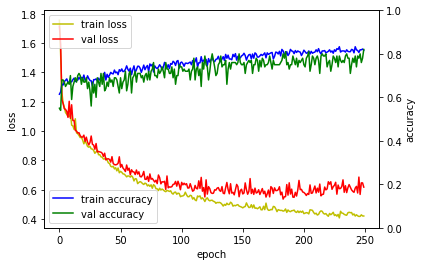

In [11]:
fig, loss_ax = plt.subplots()

# double y-axis
acc_ax = loss_ax.twinx() 

# y-axis (left)
loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')

# y-axis (right)
acc_ax.plot(hist2.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist2.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# axis labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()